In [1]:
from IPython.display import Image

In [2]:
import torch

# <font color="brown">01. 선형 회귀(Linear Regression)</font>

---

이번 챕터에서는 선형 회귀 이론에 대해서 이해하고, PyTorch를 이용하여 선형 회귀 모델을 만들어보도록 하자.

- **데이터에 대한 이해(Data Definition)**

    학습에 사용할 데이터에 대해서 알아보도록 한다.

- **가설(Hypothesis) 수립**

    가설을 수립하는 방법에 대해서 알아보도록 한다.
    
- **손실 계산하기(Compute loss)**

    학습 데이터를 이용해서 연속적으로 모델을 개선시키는데, 이 때 손실(loss)을 이용한다.
    
- **경사 하강법(Gradient Descent)**

    학습을 위한 핵심 알고리즘인 경사 하강법에 대해서 이해해보도록 한다.

## <font color="orange">1. 데이터에 대한 이해(Data Definition)</font>

### 1) 훈련 데이터셋과 테스트 데이터셋

|Hours (x)|Points (y)|
|:-----:|:-----:|
|1|2|
|2|4|
|3|6|
|4|?|

어떤 학생이 1시간 공부를 했더니 2점, 다른 학생이 2시간 공부를 했더니 4점, 또 다른 학생이 3시간을 공부했더니 6점을 맞았습니다.

그렇다면, **내가 4시간을 공부한다면 몇 점을 맞을 수 있을까?**

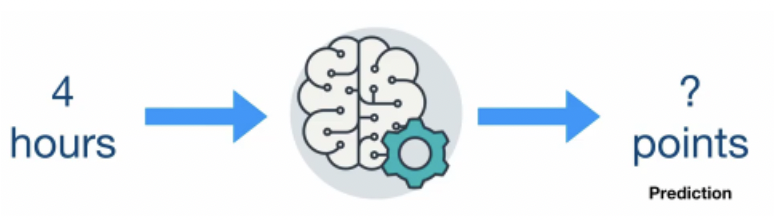

In [3]:
Image("./Images/훈련 데이터셋과 테스트 데이터셋.png", width = 600)

이 질문에 대답하기 위해서 1시간, 2시간, 3시간 공부했을 때 각각 2점, 4점, 6점이 나왔다는 앞서 나온 정보를 이용해야 한다.

이때 예측을 위해 사용하는 데이터를 **훈련 데이터셋(Training dataset)** 이라고 한다.

학습이 끝난 후, 이 모델이 얼마나 잘 작동하는지 판별하는 데이터를 **테스트 데이터셋(Test dataset)** 이라고 한다.

### 2) 훈련 데이터셋의 구성

모델을 학습시키기 위한 데이터는 파이토치의 텐서 형태를 가지고 있어야 한다.

그리고 입력과 출력을 각기 다른 텐서에 저장할 필요가 있다. 이 때 보편적으로 입력은 x, 출력은 y를 사용하여 표기한다.

In [4]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

$X_{train} = \begin{pmatrix} 1 \\ 2 \\ 3 \end{pmatrix}$

$Y_{train} = \begin{pmatrix} 2 \\ 4 \\ 6 \end{pmatrix}$

## <font color="orange">2. 가설(Hypothesis) 수립</font>

머신러닝에서 식을 세울 때, 이 식을 가설(Hypothesis)라고 한다.

보통 머신러닝에서 가설은 임의로 추측해서 세워보는 식일 수도 있고, 경험적으로 알고 있는 식일 수도 있다.

그리고 맞는 가설이 아니라고 판단되면 계속 수정해나가게 되는 식이기도 하다.

선형 회귀의 가설을 이미 널리 알려져있으며, 선형 회귀란 학습 데이터와 가장 잘 맞는 하나의 직선을 찾는 일이다.

이때 선형 회귀의 가설(직선의 방정식)은 아래와 같은 형식을 가진다.

$y = Wx + b$

가설의 $H$를 따서 $y$ 대신 다음과 같이 식을 표현하기도 한다.

$H(x) = Wx + b$

이때 $x$와 곱해지는 $W$를 가중치(weigh)라고 하며, $b$를 편항(bias)이라고 한다.

## <font color="orange">3. 비용 함수(Cost function)에 대한 이해</font>

앞으로 딥러닝을 학습하면서 아래와 같은 용어들은 전부 같은 용어로 생각하면 된다.

**비용 함수(cost function) = 손실 함수(loss function) = 오차 함수(error function) = 목적 함수(objective function)**

비용 함수에 대해서 이해하기 위해 아래의 예제를 살펴보도록 하자.

4개의 훈련 데이터가 있고, 이를 2차원 그래프에 4개의 점으로 표현한 상태라고 가정해보도록 하자.

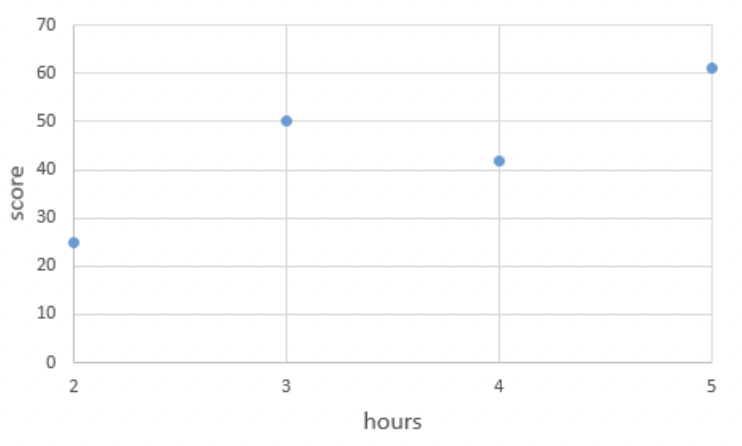

In [5]:
Image("./Images/비용함수 1.png", width = 500, height = 400)

선형 회귀의 목표는 4개의 점을 가장 잘 표현하는 직선을 그리는 일이다. 임의로 3개의 직선을 그려보도록 하자.

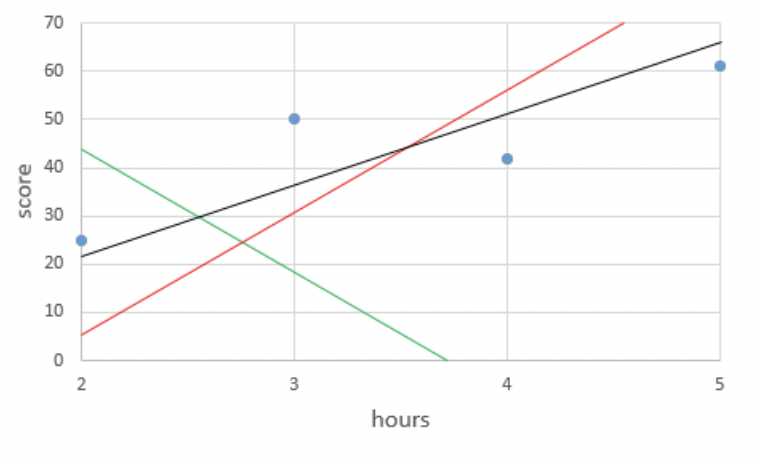

In [6]:
Image("./Images/비용함수 2.png", width = 500, height = 400)

위의 그림은 서로 다른 $W$와 $b$의 값에 따라서 천차만별로 그려진 3개 직선의 모습을 보여준다.

이 3개의 직선 중에서 4개의 점을 가장 잘 반영한 직선은 어떤 것일까?

검은색 직선이라고 말하는 사람도 있을 것이고, 잘 모르겠다고 말하는 사람도 있을 것이다.

하지만 **수학에서 느낌이라는 표현을 사용하는 것은 아무런 의미도 없다.**

어떤 직선이 가장 적절한 직선인지를 수학적은 근거를 통해 표현할 수 있어야 한다.

그래서 **오차(Error)** 라는 개념을 도입하도록 한다.

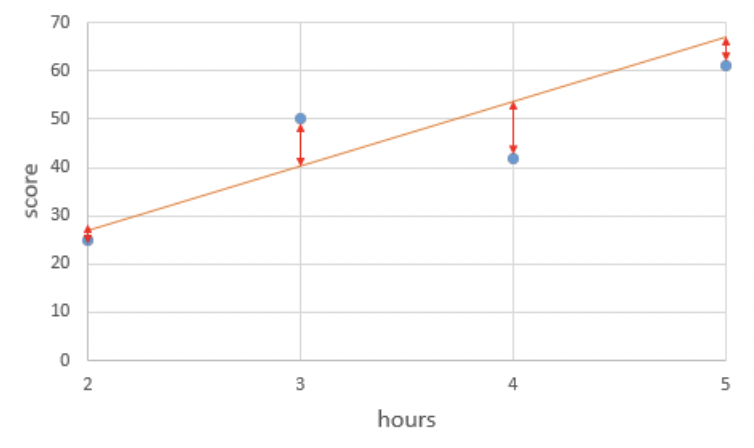

In [7]:
Image("./Images/비용함수 3.png", width = 500, height = 400)

위 그림은 임의로 그려진 주황색 선에 대해서 각 실제값과 직선의 예측값(동일한 $x$값에서의 직선의 $y$값)에 대한 값의 차이를 빨간색 화살표로 표현한 것이다.

각 실제값과 각 예측값과의 차이를 각 실제값에서의 오차라고 말할 수 있다.

이 직선의 예측값들과 실제값들과의 총 오차(total error)는 어떻게 구하는 것일까? 각 오차를 전부 더해보도록 하자.

위 주황색 직선의 식은 $y = 13x + 1$이며, 각 오차는 다음과 같다.

|hours(x)|2|3|4|5|
|-----|-----|-----|-----|-----|
|실제값|25|50|42|61|
|예측값|27|40|53|66|
|오차|-2|10|-9|-5|

수식적으로 단순히 **'오차 = 실제값 - 예측값'** 으로 정의하면 오차값이 음수가 나오는 경우가 생긴다.

위의 예시에서도 오차를 계산하면 음수가 나오게 된다.

이 경우, 오차를 모두 더하면 덧셈 과정에서 오차값이 +가 되었다가 -되었다가 하므로 제대로된 오차의 크기를 측정할 수 없다.

그래서 오차를 전부 더하는 것이 아니라, 각 오차들을 제곱해준 뒤에 전부 더해주도록 한다.

이를 수식으로 표현하면 아래와 같다.(단, 여기서 $n$은 갖고 있는 데이터의 개수를 의미한다.)

$$\sum_{i=1}^n [y^{(i)} - H(x^{(i)})]^2 = (-2)^2 + 10^2 + (-9)^2 + (-5)^2 = 210$$

이때 데이터의 개수 $n$으로 나누면, 오차의 제곱합에 대한 평균을 구할 수 있는데 이를 **평균 제곱 오차(Mean Squared Error, MSE)** 라고 한다. 수식은 아래와 같다.

$$\frac{1}{n}\sum_{i=1}^n [y^{(i)} - H(x^{(i)})]^2 = 210 / 4 = 52.5$$

이를 실제로 계산하면 52.5가 되며, 이는 주황색 직선의 예측값과 실제값의 평균 제곱 오차의 값이 52.5임을 의미한다.<br><br>

평균 제곱 오차는 이번 회귀 문제에서 적절한 $W$와 $b$를 찾기 위해서 최적화된 식이다.

그 이유는 평균 제곱 오차의 값을 최소값으로 만드는 $W$와 $b$를 찾아내는 것이 가장 훈련 데이터를 잘 반영한 직선을 찾아내는 일이기 때문이다.

평균 제곱 오차를 $W$와 $b$에 의한 비용 함수(Cost function)로 재정의해보면 다음과 같다.

$$cost(W, b) = \frac{1}{n}\sum_{i=1}^n [y^{(i)} - H(x^{(i)})]^2$$

$\therefore cost(W, b)$를 최소가 되게 만드는 $W$와 $b$를 구하면 훈련 데이터를 가장 잘 나타내는 직선을 구할 수 있다.

## <font color="orange">4. 옵티마이저 - 경사 하강법(Gradient Descent)</font>

이제 앞서 정의한 비용 함수(Cost function)의 값을 최소로 하는 $W$와 $b$를 찾는 방법에 대해서 알아보도록 하자.

이때 사용되는 것이 **옵티마이저(Optimizer)** 알고리즘이다. **최적화 알고리즘** 이라고도 불린다.

그리고 이 옵티마이저 알고리즘을 통해 적절한 $W$와 $b$를 찾아내는 과정을 머신러닝에서 학습(training)이라고 부른다.

여기서는 가장 기본적인 옵티마이저 알고리즘 **경사 하강법(Gradient Descent)** 에 대해서 학습해보도록 하자.<br><br>

이번 설명에서는 편향 $b$를 고려하지 않도록 한다.

즉, $b$가 0이라고 가정한 $y = Wx$와 같은 식을 기준으로 설명한다.

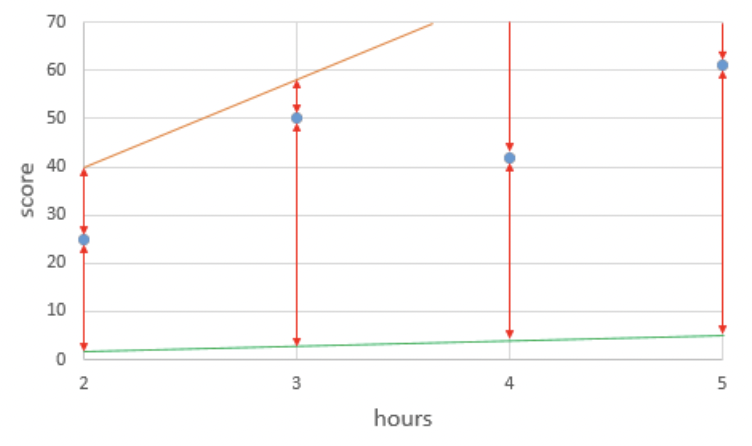

In [8]:
Image("./Images/경사하강법 1.png", width = 500, height = 400)

가중치 $W$가 직선의 방정식에서는 기울기였음을 기억하도록 하자. 이제 $W$를 기울기라고 명명하도록 하낟.

위의 그림에서 주확색선은 기울기 $W$가 20일 때, 초록색선은 기울기 $W$가 1일 때를 나타낸다.

빨간색 화살표는 각 점에서의 실제값과 두 직선의 예측값과의 오차를 나타낸다.

이는 앞서 예측에 사용했던 $y = 13x + 1$ 직선보다 확연히 큰 오차값들이다.

즉, 기울기가 지나치게 크면 실제값과 예측값의 오차가 커지고, 기울기가 지나치게 작아도 실제값과 예측값의 오차가 커진다.

사실 $b$ 또한 마찬가지인데 $b$가 지나치게 크거나 작으면 오차가 커진다.<br><br>

설명의 편의를 위해 편항 $b$가 없이 단순히 가중지 $W$만을 사용한 $H(x) = Wx$ 라는 가설을 가지고, 경사 하강법을 설명하도록 한다.

비용 함수의 값 $cost(W)$를 $cost$라고 줄여서 표현하도록 하자.

이에 따라 $W$와 $cost$의 관계를 그래프로 표현하면 다음과 같다.

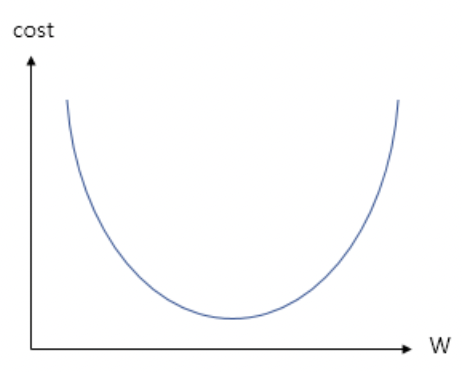

In [9]:
Image("./Images/경사하강법 2.png", width = 300, height = 300)

기울기 $W$가 무한대로 커지면 커질 수록 $cost$의 값 또한 무한대로 커지고, 반대로 기울기 $W$가 무한대로 작아져도 $cost$의 값은 무한대로 커진다.

위의 그래프에서 $cost$가 가장 작을 때는 맨 아래의 볼록한 부분이다.

기계가 해야할 일은 $cost$가 가장 최소값을 가지게 하는 $W$를 찾는 일이므로, 맨 아래의 볼록한 부분의 $W$ 값을 찾아야 한다.

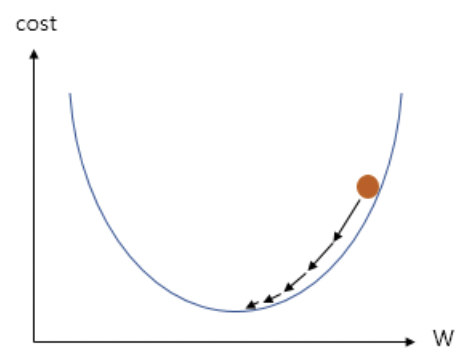

In [10]:
Image("./Images/경사하강법 3.png", width = 300, height = 300)

기계는 임의의 초기값 $W$값을 정한 뒤에, 맨 아래의 볼록한 부분을 향해 점차 $W$의 값을 수정해 나간다.

위의 그림은 $W$의 값이 점차 수정되는 과정을 보여준다.

그리고 이를 가능하게 하는 것이 **경사 하강법(Gradient Descent)** 이다.

경사 하강법은 미분을 배우게 되면 가장 처음 배우게 되는 개념인 한 점에서의 순간 변화율 또는 접선에서 기울기의 개념을 사용한다.

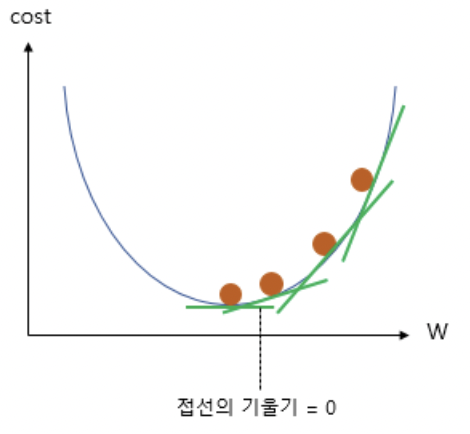

In [11]:
Image("./Images/경사하강법 4.png", width = 300, height = 300)

위의 그림에서 초록색 선은 $W$가 임의의 값을 가지게 되는 네 가지의 경우에 대해서, 그래프 상으로 접선의 기울기를 보여준다.

주목할 것은 맨 아래의 볼록한 부분으로 갈수록 접선의 기울기가 점차 작아진다는 점이다.

그리고 맨 아래의 볼록한 부분에서는 결국 접선의 기울기가 0이 된다.<br><br>

즉, $cost$가 최소화가 되는 지점은 접선의 기울기가 0이 되는 지점이며, 또한 미분값이 0이 되는 지점이다.

경사 하강법의 아이디어는 비용 함수(Cost function)를 미분하여 현재 $W$에서의 접선의 기울기를 구하고, 접선의 기울기가 낮은 방향으로 $W$의 값을 변경하는 작업을 반복한다.

이 반복 작업에는 현재 $W$에 접선의 기울기를 구해 특정 숫자 $\alpha$를 곱한 값을 빼서 새로운 $W$로 사용하는 식이 사용된다.

$$기울기 = \frac{\partial cost(W)}{\partial W}$$

기울기가 음수일 때와 양수일 때 어떻게 $W$ 값이 조정되는지 보도록 한다.

- **기울기가 음수일 때 : $W$의 값이 증가**

$$W := W - \alpha \times (음수기울기) = W + \alpha \times (양수기울기)$$

기울기가 음수면 $W$의 값이 증가하는데 이는 결과적으로 접선의 기울기가 0인 방향으로 $W$의 값이 조정된다.

만약, 접선의 기울기가 양수라면 위의 수식은 아래와 같이 표현할 수 있다.

- **기울기가 양수일 때 : $W$의 값이 감소**

$$W := W - \alpha \times (양수기울기)$$

기울기가 양수면 $W$의 값이 감소하게 되는데 이는 결과적으로 기울기가 0인 방향으로 $W$의 값이 조정된다.<br><br>

즉, 아래의 수식은 접선의 기울기가 음수거나, 양수일 때 모두 접선의 기울기가 0인 방향으로 $W$의 값을 조정한다.

$$W := W - \alpha\frac{\partial}{\partial W}cost(W)$$

그렇다면 여기서 학습률(learning rate)이라고 말하는 $\alpha$는 어떤 의미를 가지는 것일까?

학습률 $\alpha$은 $W$의 값을 변경할 대, 얼마나 크게 변경할지를 결정한다.

또는 $W$를 그래프의 한 점으로 보고 접선의 기울기가 0일 때까지 경사를 따라 내려간다는 관점에서는 얼마나 큰 폭으로 이동할지를 결정한다.

직관적으로 생각하기에 학습률 $\alpha$의 값을 무작적 크게 하면 접선의 기울기가 최소값이 되는 $W$를 빠르게 찾을 수 있을 것같지만 그렇지 않다.

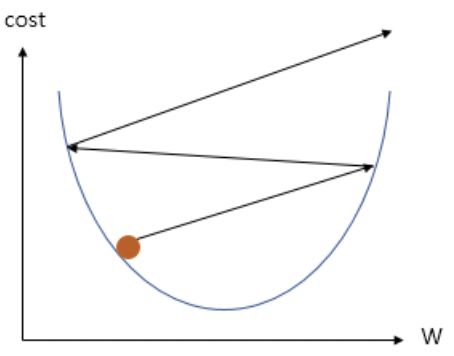

In [12]:
Image("./Images/경사하강법 5.png", width = 300, height = 300)

위의 그림은 학습률 $\alpha$가 지나치게 높은 값을 가질 때, 접선의 기울기가 0이 되는 $W$를 찾아가는 것이 아니라 $W$의 값이 발산하는 상황을 보여준다.

반대로 학습률 $\alpha$가 지나치게 낮은 값을 가지면 학습 속도가 느려지므로 적당한 $\alpha$의 값을 찾아내는 것도 중요하다.<br><br>

지금까지는 $b$를 배제시키고 최적의 $W$를 찾아내는 것에만 초점을 맞추어 경사 하강법의 원리에 대해서 배웟는데, 실제 경사 하강법은 $W$와 $b$에 대해서 동시에 경사 하강법을 수행하면서 최적의 $W$와 $b$의 값을 찾아간다.

## <font color="orange">5. 파이토치로 선형 회귀 구현하기</font>

### 1) 기본 셋팅

In [13]:
# 라이브러리 불러오기
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [14]:
# 같은 결과가 나오기 위해서 랜덤 시드 설정
torch.manual_seed(1)

### 2) 변수 선언

In [15]:
# 훈련 데이터 변수 생성
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

In [16]:
print(f"x_train : \n\n {x_train} \n")
print("Shape of x_train :", x_train.shape)

x_train : 

 tensor([[1.],
        [2.],
        [3.]]) 

Shape of x_train : torch.Size([3, 1])


In [17]:
print(f"y_train : \n\n {y_train} \n")
print("Shape of y_train :", y_train.shape)

y_train : 

 tensor([[2.],
        [4.],
        [6.]]) 

Shape of y_train : torch.Size([3, 1])


위의 결과를 통해 x_train, y_train의 크기가 (3 x 1)임을 알 수 있다.

### 3) 가중치와 편항의 초기화

선형 회귀란 학습 데이터와 가장 잘 맞는 하나의 직선을 찾는 것이다.

그리고 가장 잘 맞는 직선을 정의하는 것은 $W$와 $b$이다.

**즉, 선형 회귀의 목표는 가장 잘 맞는 직선을 정의하는 $W$와 $b$의 값을 찾는 것이다.**<br><br>

우선 가중치 $W$를 0으로 초기화하고, 이 값을 출력해보도록 하자.

In [18]:
# 가중치 W를 0으로 초기화하고 학습을 통해 값이 변경되는 변수임을 명시
W = torch.zeros(1, requires_grad = True)
print(W)

tensor([0.], requires_grad=True)


가중치 $W$가 0으로 초기화되어 있으므로 0이 출력된 것을 확인할 수 있다.

위에서 `requires_grad = True`가 인자로 주어진 것을 확인할 수 있다.

**이는 해당 변수는 학습을 통해 계속 값이 변경되는 변수임을 의미한다.**<br><br>

마찬가지로 편항 $b$도 0으로 초기화하고, 학습을 통해 값이 변경되는 변수임을 명시한다.

In [19]:
b = torch.zeros(1, requires_grad = True)
print(b)

tensor([0.], requires_grad=True)


현재 가중치 $W$와 $b$ 둘 다 0이므로 현 직선의 방정식은 다음과 같다.

$y = 0 \times x + 0$

지금 상태에선 $x$에 어떤 값이 들어가도 가설은 0을 예측하게 된다. 즉, 아직 적절한 $W$와 $b$의 값이 아님을 알 수 있다.

### 4) 가설 세우기

파이토치 코드 상으로 직선의 방정식에 해당되는 가설을 선언한다.

$H(x) = Wx + b$

In [20]:
hypothesis = x_train * W + b
print(hypothesis)

tensor([[0.],
        [0.],
        [0.]], grad_fn=<AddBackward0>)


현재 $W$와 $b$의 값이 모두 0이기 때문에 위 코드의 값이 모두 0으로 나온것을 확인할 수 있다

### 5) 비용 함수 선언하기

파이토치 코드 상으로 선형 회귀의 비용 함수에 해당되는 평균 제곱 오차를 선언한다.

$cost(W, b) = \frac{1}{n} \sum_{i=1}^n [y^{(i)} - H(x^{(i)})]^2$

In [21]:
cost = torch.mean((y_train - hypothesis) ** 2)
print(cost)

tensor(18.6667, grad_fn=<MeanBackward0>)


### 6) 경사 하강법 구현하기

이제 경사 하강법을 구현하도록 한다. 아래의 `SGD`는 경사 하강법의 일종이다.

`lr`은 학습률(learning rate)을 의미한다.

학습 대상인 $W$와 $b$가 SGD의 입력이 된다.

In [22]:
optimizer = optim.SGD([W, b], lr = 0.01)

`optimizer.zero_grad()`를 실행함으로써 미분을 통해 얻은 기울기를 0으로 초기화한다.

기울기를 초기화해야만 새로운 가중치 편향에 대해서 새로운 기울기를 구할 수 있다.

그 다음 `cost.backword()` 함수를 호출하면서 가중치 $W$와 편향 $b$에 대한 기울기가 계산된다.

그 다음 경사 하강법 최적화 함수 optimizer의 `.step()`함수를 호출하여 인수로 들어갔던 $W$와 $b$에서 리턴되는 변수들의 기울기에 학습률 0.01을 곱하여 빼줌으로서 업데이트한다.

In [23]:
# gradient를 0으로 초기화
optimizer.zero_grad()

In [24]:
# 비용 함수를 미분하여 gradient 계산
cost.backward()

In [25]:
# W와 b를 업데이트
optimizer.step()

### 7) 전체 코드

In [26]:
# 데이터 생성
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

# 모델 가중치 초기값 설정
W = torch.zeros(1, requires_grad = True)
b = torch.zeros(1, requires_grad = True)

# optimizer 설정
optimizer = optim.SGD([W, b], lr = 0.01)

# 원하는만큼 경사 하강법을 반복
nb_epochs = 2000

for epoch in range(nb_epochs + 1):
    
    # H(x) 계산
    hypothesis = x_train * W + b
    
    # Cost 계산
    cost = torch.mean((y_train - hypothesis) ** 2)
    
    # Cost로 H(x) 계산
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    # 100번마다 출력
    if epoch % 100 == 0:
        print("Epoch {:4d}/{} W : {:.3f}, b : {:.3f}, Cost : {:.6f}".format(epoch, 
                                                                            nb_epochs, 
                                                                            W.item(), 
                                                                            b.item(), 
                                                                            cost.item()))

Epoch    0/2000 W : 0.187, b : 0.080, Cost : 18.666666
Epoch  100/2000 W : 1.746, b : 0.578, Cost : 0.048171
Epoch  200/2000 W : 1.800, b : 0.454, Cost : 0.029767
Epoch  300/2000 W : 1.843, b : 0.357, Cost : 0.018394
Epoch  400/2000 W : 1.876, b : 0.281, Cost : 0.011366
Epoch  500/2000 W : 1.903, b : 0.221, Cost : 0.007024
Epoch  600/2000 W : 1.924, b : 0.174, Cost : 0.004340
Epoch  700/2000 W : 1.940, b : 0.136, Cost : 0.002682
Epoch  800/2000 W : 1.953, b : 0.107, Cost : 0.001657
Epoch  900/2000 W : 1.963, b : 0.084, Cost : 0.001024
Epoch 1000/2000 W : 1.971, b : 0.066, Cost : 0.000633
Epoch 1100/2000 W : 1.977, b : 0.052, Cost : 0.000391
Epoch 1200/2000 W : 1.982, b : 0.041, Cost : 0.000242
Epoch 1300/2000 W : 1.986, b : 0.032, Cost : 0.000149
Epoch 1400/2000 W : 1.989, b : 0.025, Cost : 0.000092
Epoch 1500/2000 W : 1.991, b : 0.020, Cost : 0.000057
Epoch 1600/2000 W : 1.993, b : 0.016, Cost : 0.000035
Epoch 1700/2000 W : 1.995, b : 0.012, Cost : 0.000022
Epoch 1800/2000 W : 1.996, 

**에포크(Epoch)** 는 전체 훈련 데이터가 학습에 한 번 사용된 주기를 말한다.

이번 실습의 경우에는 2,000번을 수행한 결과이다.

최종 훈련 결과를 보면 최적의 기울기 $W$는 2에 가깝고, $b$는 0에 가까운 것을 볼 수 있다.

## <font color="orange">6. optimizer.zero_grad()가 필요한 이유</font>

파이토치는 미분을 통해 얻은 기울기를 이전에 계산된 기울기 값에 누적시키는 특징이 있다.

In [27]:
# 예시 데이터 생성
w = torch.tensor(2.0, requires_grad = True)

nb_epochs = 20

for epoch in range(nb_epochs + 1):
    
    z = 2 * w
    
    z.backward()
    print("수식을 w로 미분한 값 : {}".format(w.grad))

수식을 w로 미분한 값 : 2.0
수식을 w로 미분한 값 : 4.0
수식을 w로 미분한 값 : 6.0
수식을 w로 미분한 값 : 8.0
수식을 w로 미분한 값 : 10.0
수식을 w로 미분한 값 : 12.0
수식을 w로 미분한 값 : 14.0
수식을 w로 미분한 값 : 16.0
수식을 w로 미분한 값 : 18.0
수식을 w로 미분한 값 : 20.0
수식을 w로 미분한 값 : 22.0
수식을 w로 미분한 값 : 24.0
수식을 w로 미분한 값 : 26.0
수식을 w로 미분한 값 : 28.0
수식을 w로 미분한 값 : 30.0
수식을 w로 미분한 값 : 32.0
수식을 w로 미분한 값 : 34.0
수식을 w로 미분한 값 : 36.0
수식을 w로 미분한 값 : 38.0
수식을 w로 미분한 값 : 40.0
수식을 w로 미분한 값 : 42.0


위의 결과를 보면 계속해서 미분값은 2가 누적되는 것을 볼 수 있다.

그렇기 때문에 `optimizer.zero_grad()`를 통해 미분값을 계속 0으로 초기화 시켜줘야 한다.

## <font color="orange">7. torch.manual_seed()를 하는 이유</font>

`torch.manual_seed()`를 사용한 프로그램의 결과는 다른 컴퓨터에서 실행시켜도 동일한 결과를 얻을 수 있다.

그 이유는 `torch.manual_seed()`는 난수 발생 순서와 값을 동일하게 보장해준다는 특징 때문이다.

우선 랜덤 시드가 3일 때 두 번 난수를 발생시켜보고, 다른 랜덤 시드를 사용한 후에 다시 랜덤 시드 3을 사용한다면 난수 발생값이 동일하게 나오는지 보도록 하자.

In [28]:
# 랜덤 시드 3으로 지정
torch.manual_seed(3)

In [29]:
print("랜덤 시드 3 \n")

for i in range(1, 3):
    print(torch.rand(1))

랜덤 시드 3 

tensor([0.0043])
tensor([0.1056])


랜덤 시드가 3일 때 두 개의 난수를 발생시켰더니 0.0043과 0.1056이 나오는 것을 확인할 수 있다.

이제 랜덤 시드값을 변경해보도록 하자.

In [30]:
# 랜덤 시드 5로 지정
torch.manual_seed(5)

In [31]:
print("랜덤 시드 5 \n")

for i in range(1, 3):
    print(torch.rand(1))

랜덤 시드 5 

tensor([0.8303])
tensor([0.1261])


0.8303과 0.1261이 나오는 것을 확인할 수 있다.

이제 랜덤 시드값을 다시 3으로 지정해보도록 하자.

In [32]:
# 랜덤 시드 3으로 지정
torch.manual_seed(3)

In [33]:
print("랜덤 시드 3 \n")

for i in range(1, 3):
    print(torch.rand(1))

랜덤 시드 3 

tensor([0.0043])
tensor([0.1056])


- 결과가 동일함을 확인할 수 있다.

# <font color="brown">02. 자동 미분(Autograd)</font>

---

경사 하강법 코드를 보면 `requires_grad = True`, `backword()` 등이 나온다.

이는 파이토치에서 제공하고 있는 자동 미분(Autograd) 기능을 수행하고 있다.

파이토치의 학습 과정을 보다 더 잘 이해하기 위해서 자동 미분에 대해서 이해해보도록 한다.

## <font color="orange">1.경사 하강법 리뷰</font>

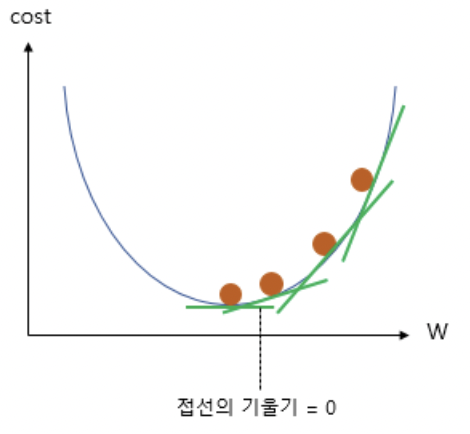

In [34]:
Image("./Images/경사하강법 4.png", width = 300, height = 300)

경사 하강법은 비용 함수를 미분하여 이 함수의 기울기를 구해서 비용이 최소화 되는 방향을 찾아내는 알고리즘이다.

비용 함수를 손실 함수, 오차 함수라고도 부르며 **비용이 최소화 되는 방향**이라는 표현 대신 **손실이 최소화 되는 방향** 또는 **오차를 최소화 되는 방향**이라고도 설명할 수 있다.

모델이 복잡해질수록 경사 하강법을 Numpy 등으로 직접 코딩하는 것은 까다로운 일이다.

파이토치에서는 이런 수고를 하지 않도록 **자동 미분(Autograd)** 을 지원한다.

자동 미분을 사용하면 미분 계산을 자동화하여 경사 하강법을 손쉽게 사용할 수 있다.

## <font color="orange">2. 자동 미분(Autograd) 실습하기</font>

자동 미분에 대해서 실습을 통해 이해해보도록 하자.

임의로 $2w^2 + 5$라는 식을 세워보고, $w$에 대해 미분해보도록 하자.

In [35]:
# 라이브러리 불러오기
import torch

값이 2인 임의읭 스칼라 텐서 $w$를 선언한다.

이때 `requires_grad`를 `True`로 설정한다.

**이는 이 텐서에 대한 기울기를 저장하겠다는 의미이다.**

이렇게 하면 `w.grad`에 w에 대한 미분값이 저장된다.

In [36]:
w = torch.tensor(2.0, requires_grad = True)
print(w)

tensor(2., requires_grad=True)


이제 수식을 정의하도록 한다.

In [37]:
y = w ** 2
z = 2*y + 5

위의 수식을 $w$에 대해서 미분해야한다.

`.backward()`를 호출하면 해당 수식의 $w$에 대한 기울기를 계산한다.

In [38]:
z.backward()

이제 `w.grad`를 출력하면 $w$가 속한 수식을 $w$로 미분한 값이 저장된 것을 확인할 수 있다.

In [39]:
print("수식을 w로 미분한 값 : {}".format(w.grad))

수식을 w로 미분한 값 : 8.0


# <font color="brown">03. 다중 선형 회귀(Multivariable Linear Regression)</font>

---

## <font color="orange">1. 데이터에 대한 이해(Data Definition)</font>

아래와 같은 훈련 데이터가 있다.

앞서 배운 단순 선형 회귀와 다른 점은 독립 변수 $x$의 개수가 1개가 아닌 3개라는 점이다.

3개의 퀴즈 점수로부터 최종 점수를 예측하는 모델을 만들어보도록 하자.

|Quiz 1 (x1)|Quiz 2 (x2)|Quiz 3 (x3)|Final (y)|
|:-----:|:-----:|:-----:|:-----:|
|73|80|75|152|
|93|88|93|185|
|89|91|80|180|
|96|98|100|196|
|73|66|70|142|

독립변수 $x$의 개수가 3개이므로 이를 수식으로 표현하면 아래와 같다.

$H(x) = w_1x_1 + w_2x_2 + w_3x_3 + b$

## <font color="orange">2. 파이토치로 구현하기</font>

In [40]:
# 라이브러리 불러오기
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [41]:
torch.manual_seed(1)

In [42]:
# 훈련 데이터 생성
x1_train = torch.FloatTensor([[73], [93], [89], [96], [73]])
x2_train = torch.FloatTensor([[80], [88], [91], [98], [66]])
x3_train = torch.FloatTensor([[75], [93], [80], [100], [70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

이제 가중치 $w$와 편향 $b$를 선언한다.

가중치 $w$도 3개 선언해주어야 한다.

In [43]:
# 가중치와 편향 초기화
w1 = torch.zeros(1, requires_grad = True)
w2 = torch.zeros(1, requires_grad = True)
w3 = torch.zeros(1, requires_grad = True)
b = torch.zeros(1, requires_grad = True)

이제 가설, 비용 함수, 옵티마이저를 선언한 후에 경사 하강법을 1,000회 반복한다.

In [44]:
# optimizer 설정
optimizer = optim.SGD([w1, w2, w3, b], lr = 1e-5)

nb_epochs = 1000

for epoch in range(nb_epochs + 1):
    
    # H(x) 계산
    hypothesis = x1_train * w1 + x2_train * w2 + x3_train * w3 + b
    
    # Cost 계산
    cost = torch.mean((y_train - hypothesis) ** 2)
    
    # Cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print("Epoch {:4d}/{} w1 : {:.3f}, w2 : {:.3f}, w3 : {:.3f}, b : {:.3f}, Cost : {:.3f}".format(epoch,
                                                                                                       nb_epochs,
                                                                                                       w1.item(),
                                                                                                       w2.item(),
                                                                                                       w3.item(),
                                                                                                       b.item(),
                                                                                                       cost.item()))

Epoch    0/1000 w1 : 0.294, w2 : 0.294, w3 : 0.290, b : 0.003, Cost : 29661.801
Epoch  100/1000 w1 : 0.688, w2 : 0.681, w3 : 0.658, b : 0.008, Cost : 5.755
Epoch  200/1000 w1 : 0.697, w2 : 0.684, w3 : 0.645, b : 0.008, Cost : 5.512
Epoch  300/1000 w1 : 0.707, w2 : 0.686, w3 : 0.634, b : 0.008, Cost : 5.282
Epoch  400/1000 w1 : 0.715, w2 : 0.689, w3 : 0.622, b : 0.008, Cost : 5.062
Epoch  500/1000 w1 : 0.724, w2 : 0.691, w3 : 0.611, b : 0.008, Cost : 4.852
Epoch  600/1000 w1 : 0.733, w2 : 0.693, w3 : 0.600, b : 0.008, Cost : 4.653
Epoch  700/1000 w1 : 0.741, w2 : 0.695, w3 : 0.589, b : 0.009, Cost : 4.462
Epoch  800/1000 w1 : 0.750, w2 : 0.697, w3 : 0.579, b : 0.009, Cost : 4.281
Epoch  900/1000 w1 : 0.758, w2 : 0.699, w3 : 0.569, b : 0.009, Cost : 4.107
Epoch 1000/1000 w1 : 0.766, w2 : 0.700, w3 : 0.559, b : 0.009, Cost : 3.942


## <font color="orange">3. 벡터와 행렬 연산으로 바꾸기</font>

위의 코드에서는 개선할 수 있는 부분이 있다.

현재 $x$의 개수가 3개였으니까 x1_train, x2_train, x3_train와 w1, w2, w3를 일일이 선언해주었다.

그런데 만약 $x$의 개수가 1,000개라고 가정해보도록 하자.

위와 같은 방식을 고수할 경우 x1_train ... x1000_train을 전부 선언하고, w1 ... w1000을 전부 선언해야 한다.

다시 말해 $x$와 $w$ 변수 선언만 총 합 2,000개를 해야한다.

또한 가설을 선언하는 부분에도 마찬가지로 x_train과 w의 곱셈이 이루어지는 항을 1,000개를 작성해야 한다.

이러한 방식은 굉장히 비효율적이다.<br><br>

이를 해결하기 위해 행렬 곱셈 연산(또는 벡터의 내적)을 사용한다.

- **행렬의 곱셉 과정에서 이루어지는 벡터 연산을 벡터의 내적(Dot Product)이라고 한다.**

가설을 벡터와 행렬 연산으로 표현하는 방법에 대해서 살펴보도록 하자.

### 1) 벡터 연산으로 이해하기

$H(X) = w_1x_1 + w_2x_2 + w_3x_3$

위 식은 아래와 같이 두 벡터의 내적으로 표현할 수 있다.

$\begin{pmatrix} x_1 & x_2 & x_3 \end{pmatrix} \cdot \begin{pmatrix} w_1 \\ w_2 \\ w_3 \end{pmatrix} = (x_1w_1 + x_2w_2 + x_3w_3)$

두 벡터를 각각 $X$와 $W$로 표현한다면, 가설은 다음과 같다.

$H(X) = XW$

$x$의 개수가 3개였음에도 이제는 $X$와 $W$라는 두 개의 변수로 표현된 것을 볼 수 있다.

### 2) 행렬 연산으로 이해하기

훈련 데이터를 살펴보고, 벡터와 행렬 연산을 통해 가설 $H(X)$를 표현해보도록 하자.

|Quiz 1 (x1)|Quiz 2 (x2)|Quiz 3 (x3)|Final (y)|
|:-----:|:-----:|:-----:|:-----:|
|73|80|75|152|
|93|88|93|185|
|89|91|80|180|
|96|98|100|196|
|73|66|70|142|

전체 훈련 데이터의 개수를 셀 수 있는 1개의 단위를 샘플(Sample)이라고 한다.

현재 샘플의 수는 총 5개이다.

각 샘플에서 $y$를 결정하게 하는 각각의 독립 변수 $x$를 특성(feature)이라고 한다.

현재 특성은 3개이다.<br><br>

이는 독립 변수 $x$들의 수가 (샘플의수 $\times$ 특성의 수) = 15개임을 의미한다.

독립 변수 $x$들을 (샘플의수 $\times$ 특성의 수)의 크기를 가지는 하나의 행렬로 표현해보도록 하자.

그리고 이 행렬을 $X$라고 하자.

$\begin{pmatrix} x_{11} x_{12} x_{13} \\ x_{21} x_{22} x_{23} \\ x_{31} x_{32} x_{33} \\ x_{41} x_{42} x_{43} \\ x_{51} x_{52} x_{53} \end{pmatrix}$

그리고 여기에 가중치 $w_1, w_2, w_3$을 원소로 하는 벡터를 $W$라 하고 이를 곱해보도록 하자.

$\begin{pmatrix} x_{11} x_{12} x_{13} \\ x_{21} x_{22} x_{23} \\ x_{31} x_{32} x_{33} \\ x_{41} x_{42} x_{43} \\ x_{51} x_{52} x_{53} \end{pmatrix} \begin{pmatrix} w_1 \\ w_2 \\ w_3]\end{pmatrix} = \begin{pmatrix} x_{11}w_1 + x_{12}w_2 + x_{13}w_3 \\ x_{21}w_1 + x_{22}w_2 + x_{23}w_3 \\ x_{31}w_1 + x_{32}w_2 + x_{33}w_3 \\ x_{41}w_1 + x_{42}w_2 + x_{43}w_3 \\ x_{51}w_1 + x_{52}w_2 + x_{53}w_3 \end{pmatrix}$

위의 식은 결과적으로 다음과 같다.

$H(X) = XW$

이 가설에 각 샘플에 더해지는 편향 $b$를 추가해보도록 한다.

샘플 수만큼 차원을 가지는 편향 벡터 $B$를 만들어 더한다.

$\begin{pmatrix} x_{11} x_{12} x_{13} \\ x_{21} x_{22} x_{23} \\ x_{31} x_{32} x_{33} \\ x_{41} x_{42} x_{43} \\ x_{51} x_{52} x_{53} \end{pmatrix} \begin{pmatrix} w_1 \\ w_2 \\ w_3]\end{pmatrix} + \begin{pmatrix} b \\ b \\ b \\ b \\ b \end{pmatrix} = \begin{pmatrix} x_{11}w_1 + x_{12}w_2 + x_{13}w_3 + b \\ x_{21}w_1 + x_{22}w_2 + x_{23}w_3 + b\\ x_{31}w_1 + x_{32}w_2 + x_{33}w_3 + b\\ x_{41}w_1 + x_{42}w_2 + x_{43}w_3 + b\\ x_{51}w_1 + x_{52}w_2 + x_{53}w_3 + b \end{pmatrix}$

위의 식은 결과적으로 다음과 같다.

$H(X) = XW + B$

결과적으로 전체 훈련 데이터의 가설 연산을 3개의 변수만으로 표현하였다.

이와 같이 벡터와 행렬 연산은 식은 간단하게 해줄 뿐만 아니라 다수의 샘플의 병렬 연산이므로 속도의 이점을 가진다.

## <font color="orange">4. 행렬 연산을 고려하여 파이토치로 구현하기</font>

이번에는 행렬 연산을 고려하여 파이토치로 재구현해보도록 한다.

이번에는 훈련 데이터 또한 행렬로 선언해야 한다.

In [45]:
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 80],
                             [96, 98, 100],
                             [73, 66, 70]])

y_train = torch.FloatTensor([[152],
                             [185],
                             [180],
                             [196],
                             [142]])

print(f"x_train :\n\n{x_train}\n")
print(f"y_train :\n\n{y_train}")

x_train :

tensor([[ 73.,  80.,  75.],
        [ 93.,  88.,  93.],
        [ 89.,  91.,  80.],
        [ 96.,  98., 100.],
        [ 73.,  66.,  70.]])

y_train :

tensor([[152.],
        [185.],
        [180.],
        [196.],
        [142.]])


이전에 x_train을 3개나 구현했던 것과 다르게 이번에는 x_train 하나에 모든 샘플을 전부 선언하였다.

다시 말해 (5 $\times$ 3) 행렬 $X$를 선언한 것이다.

x_train과 y_train의 크기를 출력해보도록 하자.

In [46]:
print("Shape of x_train :", x_train.shape, "\n")
print("Shape of y_train :", y_train.shape)

Shape of x_train : torch.Size([5, 3]) 

Shape of y_train : torch.Size([5, 1])


각각 (5 $\times$ 3) 행렬과 (5 \times 1) 행렬의 크기를 가지는 것을 확인할 수 있다.

이제 가중치 $W$와 편향 $b$를 선언하도록 한다.

In [47]:
# 가중치와 편향 생성
W = torch.zeros((3, 1), requires_grad = True)
b = torch.zeros(1, requires_grad = True)

여기서 주목할 점은 가중치 $W$의 크기가 (3 $\times$ 1) 벡터라는 점이다.

행렬의 곱셈이 성립되려면 곱셉의 **좌측에 있는 행렬의 열의 크기**와 **우측에 있는 행렬의 행의 크기**가 **일치**해야 한다.

현재 x_train 행렬의 크기는 (5 $\times$ 3)이며, $W$ 벡터의 크기는 (3 $\times$ 1)이므로 두 행렬과 벡터는 행렬곱이 가능하다.

행렬곱으로 가설을 선언하면 아래와 같다.

In [48]:
# 현재 가중치와 편향의 초기값이 0이기 때문에 가설의 값은 0이된다.
hypothesis = x_train.matmul(W) + b
print(hypothesis)

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], grad_fn=<AddBackward0>)


가설이 행렬곱으로 간단하게 정의된 것을 확인할 수 있다.

이는 앞서 x_train과 w의 곱셈이 이루어지는 각 항을 전부 기재하여 가설을 선언했던 것과 대비된다.

이 경우, 사용자가 독립 변수 $x$의 수를 후에 추가적으로 늘리거나 줄이더라도 위의 가설 선언 코드를 수정할 필요가 없다.

이제 해야할 일은 비용 함수와 옵티마이저를 정의하고, 정해진 에포크만큼 훈련을 진행하는 일이다.

이를 반영한 전체 코드는 다음과 같다.

In [49]:
# 훈련 데이터 생성
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 80],
                             [96, 98, 100],
                             [73, 66, 70]])

y_train = torch.FloatTensor([[152],
                             [185],
                             [180],
                             [196],
                             [142]])

# 가중치와 편향 초기값 생성
W = torch.zeros((3, 1), requires_grad = True)
b = torch.zeros(1, requires_grad = True)

# Optimizer 설정
optimizer = optim.SGD([W, b], lr = 1e-5)

# 반복수 설정
nb_epochs = 2000

for epoch in range(nb_epochs + 1):
    
    # H(X) 계산
    hypothesis = x_train.matmul(W) + b
    
    # Cost 계산
    cost = torch.mean((y_train - hypothesis) ** 2)
    
    # Cost로 H(X) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print("Epoch {:4d}/{} hypothesis : {}, Cost : {:.6f}".format(epoch,
                                                                         nb_epochs,
                                                                         hypothesis.squeeze().detach(),
                                                                         cost.item()))

Epoch    0/2000 hypothesis : tensor([0., 0., 0., 0., 0.]), Cost : 29661.800781
Epoch  100/2000 hypothesis : tensor([154.0433, 185.0925, 175.8312, 198.5701, 141.2221]), Cost : 5.754573
Epoch  200/2000 hypothesis : tensor([154.0278, 185.0649, 175.9335, 198.5128, 141.2284]), Cost : 5.512386
Epoch  300/2000 hypothesis : tensor([154.0120, 185.0385, 176.0329, 198.4569, 141.2353]), Cost : 5.281667
Epoch  400/2000 hypothesis : tensor([153.9960, 185.0133, 176.1295, 198.4022, 141.2426]), Cost : 5.061868
Epoch  500/2000 hypothesis : tensor([153.9797, 184.9892, 176.2233, 198.3488, 141.2504]), Cost : 4.852424
Epoch  600/2000 hypothesis : tensor([153.9632, 184.9662, 176.3143, 198.2966, 141.2586]), Cost : 4.652705
Epoch  700/2000 hypothesis : tensor([153.9465, 184.9442, 176.4028, 198.2456, 141.2672]), Cost : 4.462287
Epoch  800/2000 hypothesis : tensor([153.9296, 184.9232, 176.4888, 198.1958, 141.2762]), Cost : 4.280604
Epoch  900/2000 hypothesis : tensor([153.9126, 184.9032, 176.5724, 198.1471, 141.

- PyTorch squeeze 함수는 **(A x B x 1 x C x 1)** 형태의 텐서에서 차원이 1인 부분을 제거하여 **(A x B x C)** 형태로 만들어준다.

- PyTorch squeeze 함수는 텐서가 기록을 추적하는 것을 중단하게 할 수 있다.

In [50]:
# PyTorch squeeze 함수

# (A B 1 C 1) 차원 형태 텐서 생성
x = torch.ones(10, 5, 1, 3, 1)
print("Shape of tensor :", x.shape, "\n")

# squeeze 함수 적용
print("Shape of tensor :", x.squeeze().shape)

Shape of tensor : torch.Size([10, 5, 1, 3, 1]) 

Shape of tensor : torch.Size([10, 5, 3])


# <font color="brown">04. nn.Module로 구현하는 선형 회귀</font>

---

이번에는 파이토치에서 이미 구현되어져 제공되고 있는 함수들을 불러오는 것으로 더 쉽게 선형 회귀 모델을 구현해보도록 하자.

예를 들어 파이토치에서는 선형 회귀 모델이 `nn.Linear()`라는 함수로, 또 평균제곱오차가 `nn.functional.mas_loss()`라는 함수로 구현되어 있다.

아래는 이번 챕터에서 사용할 두 함수의 사용 예제를 간단히 보여준다.

```python
import torch as nn

model = nn.Linear(input_dim, output_dim)
```

```python
import torch.nn.functional as F

cost = F.mse_loss(prediction, y_train)
```

## <font color="orange">1. 단순 선형 회귀 구현하기</font>

In [51]:
# 라이브러리 불러오기
import torch
import torch.nn as nn
import torch.nn.functional as F

In [52]:
torch.manual_seed(1)

이제 데이터를 선언하도록 하자.

아래 데이터는 $y=2x$를 가정한 상태에서 만들어진 데이터로 이미 정답이 $W = 2, b = 0$임을 알고 있는 상태이다.

모델에 이 두 $W$와 $b$의 값을 제대로 찾아내도록 하는 것이 목표이다.

In [53]:
# 데이터 생성
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

데이터를 정의하였으니 이제 선형 회귀 모델을 구현할 차례이다.

`nn.Linear()`는 입력의 차원, 출력의 차원을 인수로 받는다.

In [54]:
# 모델 선언 및 초기화
# 단순 선형 회귀이므로 'input_dim = 1', 'output_dim = 1'
model = nn.Linear(1, 1)

하나의 입력 $x$에 대해서 하나의 출력 $y$을 가지므로, 입력 차원과 출력 차원 모두 1을 인수로 사용하였다.

model에는 가중치 $W$와 편향 $b$가 저장되어져 있다.

이 값은 `model.parameters()`라는 함수를 사용하여 불러올 수 있다.

In [55]:
print("Weight :", list(model.parameters())[0].item(), "\n")
print("Bias :", list(model.parameters())[1].item(), "\n")
print(list(model.parameters()))

Weight : 0.5152631998062134 

Bias : -0.44137823581695557 

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


2개의 값이 출력되는데 첫번째 값이 $W$이고, 두번째 값이 $b$에 해당된다.

두 값 모두 현재는 랜덤 초기화된 값이다.

그리고 두 값 모두 학습의 대상이므로 **requires_grad=True**가 되어져 있는 것을 볼 수 있다.<br><br>

이제 옵티마이저를 정의해주도록 한다.

`model.parameters()`를 사용하여 $W$와 $b$를 전달한다.

학습률은 0.01로 지정해주도록 한다.

In [56]:
# Optimizer 설정
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [57]:
# 전체 훈련 데이터에 대해 경사 하강법을 2,000회 반복
nb_epochs = 2000

for epoch in range(nb_epochs + 1):
    
    # H(X) 계산
    prediction = model(x_train)
    
    # Cost 계산
    cost = F.mse_loss(prediction, y_train)
    
    # Cost로 H(X) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print("Epoch {:4d}/{} Cost : {:.6f}".format(epoch, nb_epochs, cost.item()))

Epoch    0/2000 Cost : 13.103541
Epoch  100/2000 Cost : 0.002791
Epoch  200/2000 Cost : 0.001724
Epoch  300/2000 Cost : 0.001066
Epoch  400/2000 Cost : 0.000658
Epoch  500/2000 Cost : 0.000407
Epoch  600/2000 Cost : 0.000251
Epoch  700/2000 Cost : 0.000155
Epoch  800/2000 Cost : 0.000096
Epoch  900/2000 Cost : 0.000059
Epoch 1000/2000 Cost : 0.000037
Epoch 1100/2000 Cost : 0.000023
Epoch 1200/2000 Cost : 0.000014
Epoch 1300/2000 Cost : 0.000009
Epoch 1400/2000 Cost : 0.000005
Epoch 1500/2000 Cost : 0.000003
Epoch 1600/2000 Cost : 0.000002
Epoch 1700/2000 Cost : 0.000001
Epoch 1800/2000 Cost : 0.000001
Epoch 1900/2000 Cost : 0.000000
Epoch 2000/2000 Cost : 0.000000


Cost의 값이 매우 작고, 학습이 완료된 것을 볼 수 있다.

$x$에 임의의 값 4를 넣어 모델이 예측하는 $y$의 값을 확인해보도록 하자.

In [58]:
# 임의의 값 생성
new_var = torch.FloatTensor([[4]])

# 예측 수행
pred_y = model(new_var)
print("훈련 후, 입력이 4일 때의 예측값 :", pred_y.item())

훈련 후, 입력이 4일 때의 예측값 : 7.99890661239624


이 문제의 정답은 $y=2x$가 정답이므로 $y$값이 8에 가까우면 $W$와 $b$의 값이 어느정도 최적화가 된 것으로 볼 수 있다.

실제로 예측된 값은 약 7.9989로 8에 매우 가깝다.

이제 학습 후의 가중치와 편향의 값을 확인해보도록 하자.

In [59]:
print("Weight :", list(model.parameters())[0].item(), "\n")
print("Bias :", list(model.parameters())[1].item())

Weight : 1.999367117881775 

Bias : 0.001438319799490273


$W$의 값이 2에 가깝고, $b$의 값이 0에 가까운 것을 볼 수 있다.

- $H(x)$ 식에 입력 $x$로부터 예측된 $y$를 얻는 것을 `forward 연산`이라고 한다.

- 학습 전, `prediction = model(x_train)`은 x_train으로부터 예측값을 리턴하므로 **forward 연산**이다.

- 학습 후, `pred_y = model(new_var)`는 임의의 값 new_var로부터 예측값을 리턴하므로 **forward 연산**이다.

- 학습 과정에서 비용 함수를 미분하여 기울기를 구하는 것을 `backward 연산`이라고 한다.

- `cost.backward()`는 비용 함수로부터 기울기를 구하라는 의미이며 **backward 연산**이다.

## <font color="orange">2. 다중 선형 회귀 구현하기</font>

In [60]:
# 다중 선형 회귀 구현하기 위해 라이브러리 불러오기
import torch
import torch.nn as nn
import torch.nn.functional as F

In [61]:
torch.manual_seed(1)

이제 데이터를 선언해주도록 한다.

여기서는 3개의 $x$로부터 하나의 $y$를 예측하는 문제이다.

즉, 가설 수식은 $H(x) = w_1x_1 + w_2x_2 + w_3x_3 + b$이다.

In [62]:
# 데이터 생성
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])

y_train = torch.FloatTensor([[152],
                             [185],
                             [180],
                             [196],
                             [142]])

데이터를 정의하였으니 이제 선형 회귀 모델을 구현할 차례이다.

In [63]:
# 모델을 선언 및 초기화
model = nn.Linear(3, 1)

3개의 입력 $x$에 대해서 하나의 출력 $y$를 가지므로, 입력 차원은 3, 출력 차원은 1을 인수로 사용하ㅕㅇㅆ다.

3개의 입력을 가지기 때문에 model에는 3개의 가중치 $W$와 편향 $b$가 저장되어 있다.

In [64]:
print("Weight :", list(model.parameters())[0].detach(), "\n")
print("Bias :", list(model.parameters())[1].item(), "\n")
print(list(model.parameters()))

Weight : tensor([[ 0.2975, -0.2548, -0.1119]]) 

Bias : 0.270990252494812 

[Parameter containing:
tensor([[ 0.2975, -0.2548, -0.1119]], requires_grad=True), Parameter containing:
tensor([0.2710], requires_grad=True)]


첫번째 출력되는 것이 3개의 $W$이고, 두번째 출력되는 것이 $b$에 해당된다.

두 값 모두 현재는 랜덤 초기화한 값이다.

그리고 두 출력 결과 모드 학습의 대상이므로 **requires_grad = True**가 되어져 있다.<br><br>

이제 옵티마이저를 정의하도록 한다.

학습률은 0.00001로 정하는데, 0.01로 하지 않는 이유는 기울기가 발산하기 때문이다.

In [65]:
# Optimizer 설정
optimizer = torch.optim.SGD(model.parameters(), lr = 1e-5)

In [66]:
# 전체 훈련 데이터에 대해 경사 하강법을 2,000회 반복
nb_epochs = 2000

for epoch in range(nb_epochs + 1):
    
    prediction = model(x_train)
    
    cost = F.mse_loss(prediction, y_train)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print("Epoch {:4d}/{} Cost : {:.6f}".format(epoch, nb_epochs, cost.item()))

Epoch    0/2000 Cost : 31667.599609
Epoch  100/2000 Cost : 0.225993
Epoch  200/2000 Cost : 0.223911
Epoch  300/2000 Cost : 0.221941
Epoch  400/2000 Cost : 0.220059
Epoch  500/2000 Cost : 0.218271
Epoch  600/2000 Cost : 0.216575
Epoch  700/2000 Cost : 0.214950
Epoch  800/2000 Cost : 0.213413
Epoch  900/2000 Cost : 0.211952
Epoch 1000/2000 Cost : 0.210559
Epoch 1100/2000 Cost : 0.209230
Epoch 1200/2000 Cost : 0.207967
Epoch 1300/2000 Cost : 0.206762
Epoch 1400/2000 Cost : 0.205618
Epoch 1500/2000 Cost : 0.204529
Epoch 1600/2000 Cost : 0.203481
Epoch 1700/2000 Cost : 0.202486
Epoch 1800/2000 Cost : 0.201539
Epoch 1900/2000 Cost : 0.200634
Epoch 2000/2000 Cost : 0.199770


Cost의 값이 매우 작고 학습이 완료된 것을 볼 수 있다.

$x$에 임의의 입력 [73, 80, 75]를 넣어 모델이 예측하는 $y$의 값을 확인해보도록 한다.

In [67]:
# 임의의 값 생성
new_var = torch.FloatTensor([[73, 80, 75]])

# 예측 수행
pred_y = model(new_var)
print("훈련 후, 입력이 73, 80, 75일 때의 예측값 :", pred_y)

훈련 후, 입력이 73, 80, 75일 때의 예측값 : tensor([[151.2306]], grad_fn=<AddmmBackward0>)


In [68]:
print("Weight :", list(model.parameters())[0].detach(), "\n")
print("Bias :", list(model.parameters())[1].item())

Weight : tensor([[0.9778, 0.4539, 0.5768]]) 

Bias : 0.2801794409751892


# <font color="brown">05. 클래스로 파이토치 모델 구현하기</font>

---

파이토치 대부분의 구현체들은 대분 모델을 생성할 때 클래스(Class)를 사용하고 있다.

앞서 배운 선형 회귀를 클래스로 구현해보도록 하자.

## <font color="orange">1. 모델을 클래스로 구현하기</font>

앞의 단순 선형 회귀 모델은 아래의 코드와 같이 구현하였다.

```python
model = nn.Linear(1, 1)
```

이를 클래스로 구현하면 다음과 같다.

In [69]:
# 'torch.nn.Module'을 상속받는 클래스
class LinearRegressionModel(nn.Module):
    
    def __init__(self):
        super().__init__()
        
        # 단순 선형 회귀이므로 입력 차원과 출력 차원 모두 1
        self.linear = nn.Linear(1, 1)
        
    def forward(self, x):
        return self.linear(x)

In [70]:
model = LinearRegressionModel()

위와 같이 **클래스를 사용한 모델 구현 형식**은 대부분의 파이토치 구현체에서 사용하고 있는 방식으로 반드시 숙지할 필요가 있다.

클래스 형태의 모델은 `nn.Module`을 상속받는다.

그리고 `__init__()`에서 모델의 구조와 동작을 정의하는 생성자를 정의한다.

이는 파이썬에서 객체가 갖는 속성값을 초기화하는 역할로, 객체가 생성될 때 자동으로 호출된다.

`super()` 함수를 부르면 여기서 만든 클래스는 **nn.Module** 클래스의 속성들을 가지고 초기화 된다.

`forward()` 함수는 모델이 학습데이터를 입력받아서 **forward 연산**을 진행시키는 함수이다.

이 **forward()** 함수는 model 객체를 데이터와 함께 호출하면 자동으로 실행이 된다.

예를 들어, model이란 객체를 생성 후, **model(입력 데이터)** 와 같은 형식으로 객체를 호출하면 자동으로 **forward 연산**이 수행된다.

- $H(x)$ 식에 입력 $x$로부터 예측된 $y$를 얻는 것을 **forward 연산**이라고 한다.

다음으로 다중 선형 회귀 모델은 아래 코드와 같이 구현하였다.

```python
model = nn.Linear(3, 1)
```

이를 클래스로 구현하면 다음과 같다.

In [73]:
class MultivariateLinearRegressionModel(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 1)
        
    def forward(x):
        return self.linear(x)

In [74]:
model = MultivariateLinearRegressionModel()

## <font color="orange">2. 단순 선형 회귀 클래스로 구현하기</font>

In [75]:
# 라이브러리 불러오기
import torch
import torch.nn as nn
import torch.nn.functional as F

In [76]:
torch.manual_seed(1)

In [77]:
# 데이터 생성
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

In [92]:
# 클래스로 단순 선형 회귀 모델 구현
class LinearRegressionModel(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)
        
    def forward(self, x):
        return self.linear(x)

In [93]:
# 모델 객체 생성
model = LinearRegressionModel()

In [94]:
# Optimizer 설정
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [95]:
# 전체 훈련 데이터에 대해 경사 하강법을 2,000회 반복
nb_epochs = 2000

for epoch in range(nb_epochs + 1):
    
    # H(X) 계산
    prediction = model(x_train)
    
    # Cost 계산
    cost = F.mse_loss(prediction, y_train)
    
    # Cost로 H(X) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print("Epoch {:4d}/{} Weight : {:.5f}, Bias : {:.5f}, Cost : {:.6f}".format(epoch,
                                                                                    nb_epochs,
                                                                                    list(model.parameters())[0].item(),
                                                                                    list(model.parameters())[1].item(),
                                                                                    cost.item()))

Epoch    0/2000 Weight : -0.69089, Bias : 0.70538, Cost : 33.679783
Epoch  100/2000 Weight : 1.45264, Bias : 1.24423, Cost : 0.223159
Epoch  200/2000 Weight : 1.56974, Bias : 0.97808, Cost : 0.137899
Epoch  300/2000 Weight : 1.66178, Bias : 0.76886, Cost : 0.085213
Epoch  400/2000 Weight : 1.73413, Bias : 0.60440, Cost : 0.052656
Epoch  500/2000 Weight : 1.79100, Bias : 0.47511, Cost : 0.032539
Epoch  600/2000 Weight : 1.83571, Bias : 0.37348, Cost : 0.020107
Epoch  700/2000 Weight : 1.87085, Bias : 0.29359, Cost : 0.012425
Epoch  800/2000 Weight : 1.89848, Bias : 0.23079, Cost : 0.007678
Epoch  900/2000 Weight : 1.92019, Bias : 0.18142, Cost : 0.004744
Epoch 1000/2000 Weight : 1.93726, Bias : 0.14261, Cost : 0.002932
Epoch 1100/2000 Weight : 1.95068, Bias : 0.11211, Cost : 0.001812
Epoch 1200/2000 Weight : 1.96123, Bias : 0.08813, Cost : 0.001119
Epoch 1300/2000 Weight : 1.96953, Bias : 0.06928, Cost : 0.000692
Epoch 1400/2000 Weight : 1.97604, Bias : 0.05446, Cost : 0.000427
Epoch 15

## <font color="orange">3. 다중 선형 회귀 클래스로 구현하기</font>

In [97]:
# 라이브러리 불러오기
import torch
import torch.nn as nn
import torch.nn.functional as F

In [98]:
torch.manual_seed(1)

In [99]:
# 데이터 생성
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])

y_train = torch.FloatTensor([[152],
                             [185],
                             [180],
                             [196],
                             [142]])

In [100]:
class MultivariateLinearRegressionModel(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 1)
        
    def forward(self, x):
        return self.linear(x)

In [101]:
# 모델 객체 생성
model = MultivariateLinearRegressionModel()

In [102]:
# Optimizer 설정
optimizer = torch.optim.SGD(model.parameters(), lr = 1e-5)

In [109]:
list(model.parameters())[0].squeeze().detach()

tensor([ 0.2975, -0.2548, -0.1119])

In [112]:
# 전체 훈련 데이터에 대해 경사 하강법을 2,000회 반복
nb_epochs = 2000

for epoch in range(nb_epochs + 1):
    
    # H(X) 계산
    prediction = model(x_train)
    
    # Cost 계산
    cost = F.mse_loss(prediction, y_train)
    
    # Cost로 H(X) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print("Epoch {:4d}/{} Weight : {}, Bias : {:.5f}, Cost : {:.6f}".format(epoch,
                                                                                nb_epochs,
                                                                                list(model.parameters())[0].squeeze().detach(),
                                                                                list(model.parameters())[1].item(),
                                                                                cost.item()))

Epoch    0/2000 Weight : tensor([0.9778, 0.4539, 0.5768]), Bias : 0.28018, Cost : 0.199752
Epoch  100/2000 Weight : tensor([0.9775, 0.4546, 0.5764]), Bias : 0.28024, Cost : 0.198930
Epoch  200/2000 Weight : tensor([0.9772, 0.4553, 0.5760]), Bias : 0.28030, Cost : 0.198148
Epoch  300/2000 Weight : tensor([0.9769, 0.4560, 0.5755]), Bias : 0.28036, Cost : 0.197388
Epoch  400/2000 Weight : tensor([0.9766, 0.4567, 0.5751]), Bias : 0.28042, Cost : 0.196674
Epoch  500/2000 Weight : tensor([0.9764, 0.4574, 0.5747]), Bias : 0.28048, Cost : 0.195989
Epoch  600/2000 Weight : tensor([0.9761, 0.4581, 0.5743]), Bias : 0.28054, Cost : 0.195327
Epoch  700/2000 Weight : tensor([0.9759, 0.4587, 0.5739]), Bias : 0.28060, Cost : 0.194704
Epoch  800/2000 Weight : tensor([0.9757, 0.4593, 0.5736]), Bias : 0.28066, Cost : 0.194097
Epoch  900/2000 Weight : tensor([0.9754, 0.4599, 0.5732]), Bias : 0.28072, Cost : 0.193519
Epoch 1000/2000 Weight : tensor([0.9752, 0.4605, 0.5728]), Bias : 0.28078, Cost : 0.192972

# <font color=brown>06. 미니 배치와 데이터 로드(Mini Batch and Data Load)</font>

---

이번 챕터에서 배우는 내용은 선형 회귀에 한정되는 내용이 아니다.

이번 챔터에서는 데이터를 로드하는 방법과 미니 배치 경사 하강법(Minibatch Gradient Descent)에 대해서 학습한다.

## <font color="orange">1. 미니 배치와 배치 크기(Mini Batch and Batch Size)</font>

앞의 다중 선형 회귀에서 사용했던 데이터를 상기해보도록 하자.

```python
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])

y_train = torch.FloatTensor([[152],
                             [185],
                             [180],
                             [196],
                             [142]])
```

위 데이터의 샘플 개수는 5개이다.

전체 데이터를 하나의 행렬로 선언하여 전체 데이터에 대해서 경사 하강법을 수행하여 학습할 수 있다.

그런데 위 데이터는 현업에서 다루게되는 방대한 양의 데이터에 비하면 굉장히 적은 양이다.

만약, 데이터가 수십만개 이상이라면 전체 데이터에 대해서 경사 하강법을 수행하는 것은 매우 느릴 뿐만 아니라 많은 계산량이 필요하다.<br><br>

그렇기 떄문에 전체 데이터를 더 작은 단위로 나누어서 해당 단위로 학습하는 개념이 나오게 되었다.

이 단위를 **미니 배치(Mini Batch)** 라고 한다.

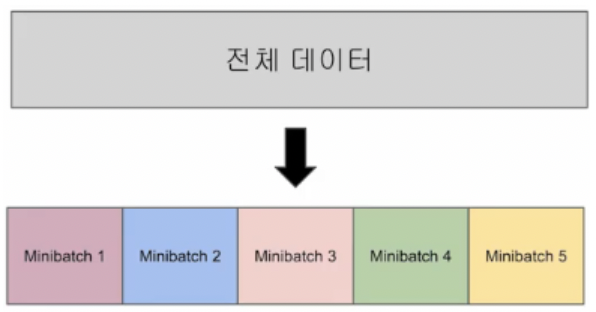

In [116]:
Image("./Images/미니배치.png", width = 400, height = 300)

위의 그림은 전체 데이터를 미니 배치 단위로 나누는 것을 보여준다.

미니 배치 학습을 하게되면 미니 배치만큼만 가져가서 미니 배치에 대한 비용을 계산하고, 경사 하강법을 수행한다.

그리고 다음 미니 배치를 가져가서 경사 하강법을 수행하고 마지막 미니 배치까지 이를 반복한다.

이렇게 전체 데이터에 대한 학습이 1회 끝나면 **1 에포크(Epoch)** 가 끝나게 된다.<br><br>

미니 배치 학습에서는 미니 배치의 개수만큼 경사 하강법을 수행해야 전체 데이터가 한 번 전부 사용되어 1 에포크가 된다.

미니 배치의 개수는 결국 미니 배치의 크기를 몇으로 하느냐에 따라서 달라지는데, 미니 배치의 크기를 **배치 크기(Batch Size)** 라고 한다.

- **전체 데이터에 대해서 한 번에 경사 하강법을 수행하는 방법을 `배치 경사 하강법`이라고 부르며, 미니 배치 단위로 경사 하강법을 수행하는 방법을 `미니 배치 경사 하강법`이라고 부른다.**

- **`배치 경사 하강법`은 경사 하강법을 할 때, 전체 데이터를 사용하므로 가중치 값이 최적값에 수렴하는 과정이 매우 안정적이지만, 계산량이 너무 많이 든다.**

- **`미니 배치 경사 하강법`은 경사 하강법을 할 때, 전체 데이터의 일부만 보고 수행하므로 최적값에 수렴하는 과정에서 값이 조금 헤매기도 하지만 훈련 속도가 빠르다.**

- 배치 크기는 보통 2의 제곱수를 사용한다.

## <font color="orange">2. 이터레이션(Iteration)</font>

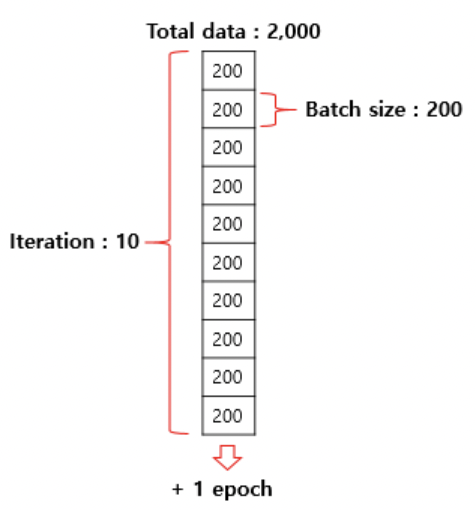

In [124]:
Image("./Images/Iteration.png", width = 300, height = 500)

위의 그림은 에포크와 배치 크기, 이터레이션의 관계를 보여준다. 위 그림의 예제를 통해 설명해보도록 한다.

`이터레이션(Iteration)`은 한 번의 에포크 내에서 이루어지는 매개변수인 가중치 $W$와 $b$의 업데이트 횟수이다.

전체 데이터가 2,000일 때 배치 크기를 2000으로 한다면 이터레이션의 수는 총 10개이다.

**이는 한 번의 에포크 당 매개변수 업데이트가 10번 이루어짐을 의미한다.**

## <font color="orange">3. 데이터 로드하기(Data Load)</font>

파이토치에서는 데이터를 좀 더 쉽게 다룰 수 있도록 **데이터셋(Dataset)** 과 **데이터로더(DataLoader)** 를 제공한다.

이를 사용하면 `미니 배치 학습`, `데이터 Shuffle`, `병렬 처리`까지 간단히 수행할 수 있다.

기본적인 사용 방법은 Dataset을 정의하고, 이를 DataLoader에 전달하는 것이다.<br><br>

Dataset을 커스텀하여 만들 수도 있지만, 여기서는 텐서를 입력받아 Dataset의 형태로 변환해주는 `TensorDataset`을 사용해보도록 하자.

In [155]:
# 라이브러리 불러오기
import torch
import torch.nn as nn
import torch.nn.functional as F

# 'TensorDataset'과 'DataLoader' 불러오기
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

`TensorDataset`함수는 기본적으로 텐서를 입력 받는다.

In [156]:
torch.manual_seed(1)

In [157]:
# 데이터 생성
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])

y_train = torch.FloatTensor([[152],
                             [182],
                             [180],
                             [196],
                             [142]])

In [158]:
# 파이토치의 데이터셋 만들기
dataset = TensorDataset(x_train, y_train)

위와 같이 파이토치의 데이터셋을 만들었다면 데이터로더를 사용할 수 있다.

데이터로더는 기본적으로 2개의 인자를 입력받는다. **데이터 셋**과 **미니 배치의 크기**이다.

이때 미니 배치의 크기는 통상적으로 2의 배수를 사용한다.

그리고 추가적으로 많이 사용되는 인자로 **shuffle**이 있다.

`shuffle = True`를 선택하면 Epoch마다 데이터셋을 섞어서 데이터가 학습되는 순서를 바꾼다.<br><br>

사람도 같은 문제지를 계속 풀면 어느 순간 문제의 순서에 익숙해질 수 있다.

따라서 모델이 데이터셋의 순서에 익숙해지는 것을 방지하여 학습할 때는 이 옵션에 True를 주는 것을 권장한다.

In [159]:
# DataLoader
dataloader = DataLoader(dataset, batch_size = 2, shuffle = True)

이제 모델과 옵티마이저를 생성하도록 한다.

In [160]:
# 모델 생성
model = nn.Linear(3, 1)

# Optimizer 설정
optimizer = torch.optim.SGD(model.parameters(), lr = 1e-5)

In [161]:
# Epoch = 20
nb_epochs = 20

for epoch in range(nb_epochs + 1):
    for batch_idx, samples in enumerate(dataloader):
        
        print(f"\n**Features data** : \n\n{samples[0].squeeze()} \n")
        print(f"**Target data** : \n\n{samples[1].squeeze()} \n")
        
        x_train, y_train = samples
        
        # H(x) 계산
        prediction = model(x_train)
        
        # Cost 계산
        cost = F.mse_loss(prediction, y_train)
        
        # Cost로 H(x) 개선
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
        print("-----Epoch {:4d}/{} Batch {}/{} Cost : {:.6f}".format(epoch, nb_epochs, batch_idx + 1, len(dataloader), cost.item()))


**Features data** : 

tensor([[73., 66., 70.],
        [73., 80., 75.]]) 

**Target data** : 

tensor([142., 152.]) 

-----Epoch    0/20 Batch 1/3 Cost : 23071.781250

**Features data** : 

tensor([[ 89.,  91.,  90.],
        [ 96.,  98., 100.]]) 

**Target data** : 

tensor([180., 196.]) 

-----Epoch    0/20 Batch 2/3 Cost : 17581.359375

**Features data** : 

tensor([93., 88., 93.]) 

**Target data** : 

182.0 

-----Epoch    0/20 Batch 3/3 Cost : 3347.412354

**Features data** : 

tensor([[ 73.,  80.,  75.],
        [ 96.,  98., 100.]]) 

**Target data** : 

tensor([152., 196.]) 

-----Epoch    1/20 Batch 1/3 Cost : 943.577332

**Features data** : 

tensor([[89., 91., 90.],
        [73., 66., 70.]]) 

**Target data** : 

tensor([180., 142.]) 

-----Epoch    1/20 Batch 2/3 Cost : 215.335785

**Features data** : 

tensor([93., 88., 93.]) 

**Target data** : 

182.0 

-----Epoch    1/20 Batch 3/3 Cost : 58.551594

**Features data** : 

tensor([[89., 91., 90.],
        [73., 66., 70.]]

이제 모델의 입력으로 임의의 값을 넣어 예측값을 확인해보도록 하자.

In [162]:
# 임의의 값 생성
new_var = torch.FloatTensor([[73, 80, 75]])

# 얘측 후 확인
pred_y = model(new_var)
print("훈련 후, 입력이 73, 80, 75일 때의 예측값 :", pred_y.item())

훈련 후, 입력이 73, 80, 75일 때의 예측값 : 150.41563415527344


# <font color="brown">07. 커스텀 데이터셋(Custom Dataset)</font>

----

파이토치에서는 데이터셋을 좀 더 쉽게 다룰 수 있도록 유용한 도구로서 `torch.utils.data.Dataset`과 `torch.utils.data.DataLoader`를 제공한다.

이를 사용하면 **미니 배치 학습, 데이터 Shuffle, 병렬 처리**까지 간단히 수행할 수 있다.

## <font color="orange">1. 커스텀 데이터셋(Custom Dataset)</font>

데이터셋을 직접 만들어줘도 되지만, `torch.utils.data.Dataset`을 상속받아 직접 커스텀 데이터셋을 만드는 경우도 있다.

**torch.utils.data.Dataset**은 파이토치에서 데이터셋을 제공하는 추상 클래스이다.

Dataset을 상속받아 다음 메소드들을 오버라이드 하여 커스텀 데이터셋을 만들어보도록 하자.<br><br>

커스텀 데이터셋을 만들 때, 가장 기본적인 뼈대는 아래와 같다.

여기서 필요한 기본적인 define은 3개이다.

```python
class CustomDataset(torch.utils.data.Dataset):
    
    def __init__(self):
        # 데이터셋의 전처리를 해주는 부분
        
    def __len__(self):
        # 데이터셋의 길이. 즉, 총 샘플의 수를 적어주는 부분
        
    def __getitem__(self, idx):
        # 데이터셋에서 특정 1개의 샘플을 가져오는 함수
```

- len(dataset)을 했을 때, 데이터셋의 크기를 리턴할 **len**

- dataset[i]을 했을 때, i번째 샘플을 가져오도록 하는 인덱싱을 위한 **get_item**

## <font color="orange">2. 커스텀 데이터셋으로 선형 회귀 구현하기</font>

In [177]:
# 라이브러리 불러오기
import torch
import torch.nn.functional as F

from torch.utils.data import Dataset, DataLoader

In [178]:
torch.manual_seed(1)

In [179]:
# Dataset 상속 클래스 만들기
class CustomDataset(Dataset):
    
    def __init__(self):
        
        # Feature data 생성
        self.x_data = [[73, 80, 75],
                       [93, 88, 93],
                       [89, 91, 90],
                       [96, 98, 100],
                       [73, 66, 70]]
        
        # Target data 생성
        self.y_data = [[152],
                       [185],
                       [180],
                       [196],
                       [142]]
    
    def __len__(self):
        return len(self.x_data)
    
    def __getitem__(self, idx):
        
        x = torch.FloatTensor(self.x_data[idx])
        y = torch.FloatTensor(self.y_data[idx])
        
        return x, y

In [180]:
# Dataset과 DataLoader 생성
dataset = CustomDataset()
dataloader = DataLoader(dataset, batch_size = 2, shuffle = True)

In [181]:
# 모델 생성
model = torch.nn.Linear(3, 1)

# Optimizer 생성
optimizer = torch.optim.SGD(model.parameters(), lr = 1e-5)

In [182]:
nb_epochs = 20

for epoch in range(nb_epochs + 1):
    for batch_idx, samples in enumerate(dataloader):
        
        x_train, y_train = samples
        
        # H(x) 계산
        prediction = model(x_train)
        
        # Cost 계산
        cost = F.mse_loss(prediction, y_train)
        
        # Cost로 H(x) 개선
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
        print("Epoch {:4d}/{} Batch {}/{} Cost : {:.6f}".format(epoch, nb_epochs, batch_idx + 1, len(dataloader), cost.item()))

Epoch    0/20 Batch 1/3 Cost : 23071.781250
Epoch    0/20 Batch 2/3 Cost : 17581.359375
Epoch    0/20 Batch 3/3 Cost : 3703.553467
Epoch    1/20 Batch 1/3 Cost : 857.132324
Epoch    1/20 Batch 2/3 Cost : 194.912857
Epoch    1/20 Batch 3/3 Cost : 103.150658
Epoch    2/20 Batch 1/3 Cost : 16.460945
Epoch    2/20 Batch 2/3 Cost : 10.970690
Epoch    2/20 Batch 3/3 Cost : 2.953053
Epoch    3/20 Batch 1/3 Cost : 1.246327
Epoch    3/20 Batch 2/3 Cost : 0.095030
Epoch    3/20 Batch 3/3 Cost : 0.104387
Epoch    4/20 Batch 1/3 Cost : 0.678442
Epoch    4/20 Batch 2/3 Cost : 0.123367
Epoch    4/20 Batch 3/3 Cost : 0.118070
Epoch    5/20 Batch 1/3 Cost : 0.094797
Epoch    5/20 Batch 2/3 Cost : 0.531496
Epoch    5/20 Batch 3/3 Cost : 0.011195
Epoch    6/20 Batch 1/3 Cost : 0.219984
Epoch    6/20 Batch 2/3 Cost : 0.042412
Epoch    6/20 Batch 3/3 Cost : 0.917457
Epoch    7/20 Batch 1/3 Cost : 0.213805
Epoch    7/20 Batch 2/3 Cost : 0.640247
Epoch    7/20 Batch 3/3 Cost : 0.005267
Epoch    8/20 Batch 1

In [183]:
# 임의의 값 생성
new_var = torch.FloatTensor([[73, 80, 75]])

# 얘측 후 확인
pred_y = model(new_var)
print("훈련 후, 입력이 73, 80, 75일 때의 예측값 :", pred_y.item())

훈련 후, 입력이 73, 80, 75일 때의 예측값 : 151.08294677734375


# <font color="brown">References</font>

---

- [PyTorch로 시작하는 딥러닝 입문](https://wikidocs.net/book/2788)